In [38]:
import numpy as np
import string 
from collections import Counter
from sklearn import svm 
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [2]:
""" Importing IMDB Training Set """
train_IMDB_par = []
train_IMDB_label = []
with open ('IMDB-train.txt','r',encoding="utf8") as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split('.\n') 
        lread = [''.join(c for c in s if c not in string.punctuation) for s in lread]
        train_IMDB_par.append(np.array(lread[0][:-3])) 
        train_IMDB_label.append(np.array(lread[0][-2]))
train_IMDB_par = np.char.lower( train_IMDB_par) 
train_IMDB_label= np.array(train_IMDB_label)
train_IMDB_par = np.reshape(train_IMDB_par,(15000,1))
train_IMDB_label = np.reshape(train_IMDB_label,(15000,1))
train_IMDB = np.hstack ((train_IMDB_par,train_IMDB_label))

# print(len(train_IMDB_label))
# print(train_IMDB_label.shape)
# print(train_IMDB_par.shape)
# print(train_IMDB.shape)
# # print(train_IMDB[0][0])

In [3]:
""" Importing IMDB Validation Set """
valid_IMDB_par = []
valid_IMDB_label = []
with open ('IMDB-valid.txt','r',encoding="utf8") as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split('.\n') 
        lread = [''.join(c for c in s if c not in string.punctuation) for s in lread]
        valid_IMDB_par.append(np.array(lread[0][:-3])) 
        valid_IMDB_label.append(np.array(lread[0][-2]))
valid_IMDB_par = np.char.lower( valid_IMDB_par) 
valid_IMDB_label= np.array(valid_IMDB_label)
valid_IMDB_par = np.reshape(valid_IMDB_par,(10000,1))
valid_IMDB_label = np.reshape(valid_IMDB_label,(10000,1))
valid_IMDB = np.hstack ((valid_IMDB_par,valid_IMDB_label))

# print(len(valid_IMDB_label))
# print(valid_IMDB_label.shape)
# print(valid_IMDB_par.shape)
# print(valid_IMDB.shape)
# # print(valid_IMDB[0][1])

In [4]:
""" Importing IMDB Test Set """
test_IMDB_par = []
test_IMDB_label = []
with open ('IMDB-test.txt','r',encoding="utf8") as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split('.\n') 
        lread = [''.join(c for c in s if c not in string.punctuation) for s in lread]
        test_IMDB_par.append(np.array(lread[0][:-3])) 
        test_IMDB_label.append(np.array(lread[0][-2]))
test_IMDB_par = np.char.lower( test_IMDB_par) 
test_IMDB_label= np.array(test_IMDB_label)
test_IMDB_par = np.reshape(test_IMDB_par,(25000,1))
test_IMDB_label = np.reshape(test_IMDB_label,(25000,1))
test_IMDB = np.hstack ((test_IMDB_par,test_IMDB_label))

# print(len(test_IMDB_label))
# print(test_IMDB_label.shape)
# print(test_IMDB_par.shape)
# print(test_IMDB.shape)
# # print(test_IMDB[0][1])

In [5]:
def CountFrequency(x):
    x = x.squeeze()
    l = []
    for i in range(len(x)):
        l.append(x[i])
    l = ''.join(l)
    l = l.replace('  ', ' ')
    l = l.split(' ')
    l = [i for i in l if not i.isdigit()]
    return Counter(l)

In [6]:
""" Counting Words in Training Set of IMDB Dataset """
train_IMDB_vocab = CountFrequency(train_IMDB_par)
IMDB_FeatureSet = train_IMDB_vocab.most_common(10000)
# print(IMDB_FeatureSet)
# print(train_IMDB_vocab)
IMDB_Feature = []
IMDB_FeatureValue = []
for i in range(len(IMDB_FeatureSet)):
    IMDB_Feature.append(IMDB_FeatureSet[i][0])
    IMDB_FeatureValue.append(IMDB_FeatureSet[i][1])
    
# IMDB_Feature = np.transpose(np.array([IMDB_Feature]))
# IMDB_FeatureValue = np.transpose(np.array([IMDB_FeatureValue]))

# print(IMDB_FeatureSet)
# print(IMDB_Feature[0:10])
# print(IMDB_FeatureValue [0:10])


In [7]:
Vocab = []
index = []
Vocab_new = np.zeros([10000,1])
# np.str(Vocab_new)
Vocab = np.chararray((10000,3))
for i in range(len(Vocab)):
    index.append(i+1)
Vocab = np.vstack((IMDB_Feature, index))
Vocab = Vocab.T
Vocab = np.insert(Vocab, 2, IMDB_FeatureValue , axis=1)
print(Vocab[0])

['the' '1' '198988']


In [8]:
with open('./dataset/IMDB-vocab.txt', 'w',encoding="utf8") as f:
    for line in Vocab:
        f.write(line[0]+' '+line[1]+' '+line[2]+'\n')

In [9]:
dictionary = {}
for word in Vocab:
    dictionary[word[0]] = word[1]

In [10]:
train = []
for i in range(len(train_IMDB)):
    sentence = []
    words = train_IMDB[i][0].split()
    for j in range(len(words)):
        if words[j] in dictionary:
            sentence.append(dictionary[words[j]])
    sentence = ' '.join(sentence)
    train.append([sentence,train_IMDB[i][1]])
    

In [11]:
with open('./dataset/IMDB-train.txt', 'w',encoding="utf8") as f:
    for line in train:
        f.write(line[0]+' '+line[1]+'\n')

In [12]:
validation = []
for i in range(len(valid_IMDB)):
    sentence = []
    words = valid_IMDB[i][0].split()
    for j in range(len(words)):
        if words[j] in dictionary:
            sentence.append(dictionary[words[j]])
    sentence = ' '.join(sentence)
    validation.append([sentence,valid_IMDB[i][1]])

In [13]:
with open('./dataset/IMDB-valid.txt', 'w',encoding="utf8") as f:
    for line in validation:
        f.write(line[0]+' '+line[1]+'\n')

In [14]:
test = []
for i in range(len(test_IMDB)):
    sentence = []
    words = test_IMDB[i][0].split()
    for j in range(len(words)):
        if words[j] in dictionary:
            sentence.append(dictionary[words[j]])
    sentence = ' '.join(sentence)
    test.append([sentence,test_IMDB[i][1]])

In [15]:
with open('./dataset/IMDB-test.txt', 'w',encoding="utf8") as f:
    for line in validation:
        f.write(line[0]+' '+line[1]+'\n')

# Random Classifier


In [16]:
""" Random Classifier """
random_label = np.zeros([25000])
np.random.seed(1)
for i in range(len(test_IMDB_label)):
    random_label[i] = np.random.randint(0,2) 
    
test_labels = np.array(test_IMDB_label, dtype= float)

counter = 0
for i in range(len(test_labels)):
    if test_labels[i] == random_label[i]:
        counter = counter + 1
# print(counter)

performance_randomClassifier = (counter/len(test_labels))*100
print("Accuracy of Random Classifier: ",performance_randomClassifier)


""" Calculate F1-Measure """

F1_measure = f1_score(test_labels, random_label, average='macro')*100

print("F1-Measure for Random Classifier:", F1_measure)

Accuracy of Random Classifier:  50.564
F1-Measure for Random Classifier: 50.5636658104


#  Binary Bag-of-word 


In [17]:
IMDB_TrainBinaryBag = np.zeros([15000,10000]) 
for i in range(len(train_IMDB_par)):
    sentence = np.apply_along_axis(lambda a: (a[0].split(' ')),0,train_IMDB_par[i])
    for j in range(len(IMDB_Feature)):
        if IMDB_Feature[j] in sentence:
            IMDB_TrainBinaryBag[i][j] = 1

In [18]:
IMDB_ValidBinaryBag = np.zeros([10000,10000]) 
for i in range(len(valid_IMDB_par)):
    sentence = np.apply_along_axis(lambda a: (a[0].split(' ')),0,valid_IMDB_par[i])
    for j in range(len(IMDB_Feature)):
        if IMDB_Feature[j] in sentence:
            IMDB_ValidBinaryBag[i][j] = 1

In [19]:
IMDB_TestBinaryBag = np.zeros([25000,10000])
for i in range(len(test_IMDB_par)):
    sentence = np.apply_along_axis(lambda a: (a[0].split(' ')),0,test_IMDB_par[i])
    for j in range(len(IMDB_Feature)):
        if IMDB_Feature[j] in sentence:
            IMDB_TestBinaryBag[i][j] = 1

# Naive Bayes Hyperparameter Tuning

C:\Users\niloo\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Validation F1-Measure: 83.9772081888 		alpha: 0.0
Validation F1-Measure: 84.1764396989 		alpha: 0.0134228187919
Validation F1-Measure: 84.1963487244 		alpha: 0.0268456375839
Validation F1-Measure: 84.1963487244 		alpha: 0.0402684563758
Validation F1-Measure: 84.2163533463 		alpha: 0.0536912751678
Validation F1-Measure: 84.1964441999 		alpha: 0.0671140939597
Validation F1-Measure: 84.1965384098 		alpha: 0.0805369127517
Validation F1-Measure: 84.2064936837 		alpha: 0.0939597315436
Validation F1-Measure: 84.1863943398 		alpha: 0.107382550336
Validation F1-Measure: 84.1863943398 		alpha: 0.120805369128
Validation F1-Measure: 84.1963487244 		alpha: 0.134228187919
Validation F1-Measure: 84.1963487244 		alpha: 0.147651006711
Validation F1-Measure: 84.1963487244 		alpha: 0.161073825503
Validation F1-Measure: 84.1863943398 		alpha: 0.174496644295
Validation F1-Measure: 84.1863943398 		alpha: 0.187919463087
Validation F1-Measure: 84.2162567274 		alpha: 0.201342281879
Validation F1-Measure: 84.21

Validation F1-Measure: 84.093637455 		alpha: 1.8255033557
Validation F1-Measure: 84.1135176798 		alpha: 1.8389261745
Validation F1-Measure: 84.1135176798 		alpha: 1.85234899329
Validation F1-Measure: 84.1034491904 		alpha: 1.86577181208
Validation F1-Measure: 84.1034491904 		alpha: 1.87919463087
Validation F1-Measure: 84.1034491904 		alpha: 1.89261744966
Validation F1-Measure: 84.1034491904 		alpha: 1.90604026846
Validation F1-Measure: 84.1034491904 		alpha: 1.91946308725
Validation F1-Measure: 84.1034491904 		alpha: 1.93288590604
Validation F1-Measure: 84.1034491904 		alpha: 1.94630872483
Validation F1-Measure: 84.1034491904 		alpha: 1.95973154362
Validation F1-Measure: 84.0933803011 		alpha: 1.97315436242
Validation F1-Measure: 84.0933803011 		alpha: 1.98657718121
Validation F1-Measure: 84.0833110115 		alpha: 2.0

Best Alpha is 0.0536912751678 and F1-Measure for validation set corresponding to best Alpha is 84.2163533463


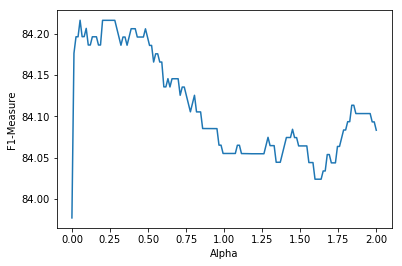

In [20]:
""" Naive Bayes """
x_NB_train = IMDB_TrainBinaryBag
y_NB_train = np.ravel(train_IMDB_label)
x_NB_valid = IMDB_ValidBinaryBag
y_NB_valid = np.ravel(valid_IMDB_label)
x_NB_test = IMDB_TestBinaryBag
y_NB_test = np.ravel(test_IMDB_label)

"""Hyper Parameter Tuning on Validation Set"""
F1_measure_NB = []
alpha_list_NB = []
for alpha in np.linspace(0,2,150):
    mnb = BernoulliNB(alpha =alpha)
    mnb.fit(x_NB_train,y_NB_train)
    result_valid= mnb.predict(x_NB_valid)
    F1_measure_valid = f1_score(valid_IMDB_label ,result_valid ,average='macro')*100
    F1_measure_NB = np.append(F1_measure_NB, F1_measure_valid)
    alpha_list_NB = np.append(alpha_list_NB, alpha)
    print("Validation F1-Measure:", F1_measure_valid,"\t\t""alpha:", alpha)

bestalpha = alpha_list_NB[np.argmax(F1_measure_NB)]
print('\n''Best Alpha is', bestalpha,'and F1-Measure for validation set corresponding to best Alpha is', max(F1_measure_NB))

""" Plotting """

a = F1_measure_NB.squeeze()
b = alpha_list_NB.squeeze()
plt.plot(b , a)
plt.ylabel('F1-Measure')
plt.xlabel('Alpha')
# plt.legend(loc ='upper right')
plt.show()

# Naive Bayse Classifier

In [59]:
""" Naive Bayes for Training Set """
mnb = BernoulliNB(alpha = 1.0)
mnb.fit(x_NB_train,y_NB_train)
result_train= mnb.predict(x_NB_train)

accuracy_train = accuracy_score(result_train,y_NB_train)*100
F1_measure_train = f1_score(train_IMDB_label ,result_train ,average='macro')*100
print("Train Set has Accuracy",accuracy_train ,"and F1-Measure",F1_measure_train,".")

""" Naive Bayes for Validation Set """
result_valid= mnb.predict(x_NB_valid)

accuracy_valid = accuracy_score(result_valid,y_NB_valid)*100
F1_measure_valid = f1_score(valid_IMDB_label, result_valid, average='macro')*100
print("Validation Set has Accuracy",accuracy_valid ,"and F1-Measure",F1_measure_valid,".")


""" Naive Bayes for Test Set """
result_test= mnb.predict(x_NB_test)

accuracy_test = accuracy_score(result_test,y_NB_test)*100
F1_measure_test = f1_score(test_IMDB_label, result_test, average='macro')*100
print("Test Set has Accuracy",accuracy_test ,"and F1-Measure",F1_measure_test,".")


# y_NB_valid = valid_yelp_label
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_NB_valid, result)


Train Set has Accuracy 86.8333333333 and F1-Measure 86.8283076595 .
Validation Set has Accuracy 84.06 and F1-Measure 84.055172544 .
Test Set has Accuracy 83.144 and F1-Measure 83.1247666621 .


Confusion matrix, without normalization
[[10815  1685]
 [ 2529  9971]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.2   0.8 ]]


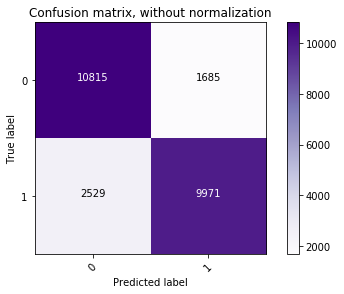

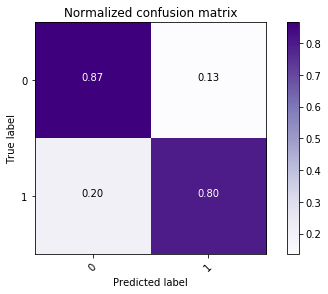

In [60]:
class_names = ['0', '1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_IMDB_label, result_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Support Vector Machine Hyperparameter Tuning


Validation F1-Measure: 78.9375628415 		C: 1e-05
Validation F1-Measure: 79.4774256483 		C: 1.38949549437e-05
Validation F1-Measure: 80.199992872 		C: 1.93069772888e-05
Validation F1-Measure: 80.5894951328 		C: 2.68269579528e-05
Validation F1-Measure: 81.228085077 		C: 3.72759372031e-05
Validation F1-Measure: 81.8672566973 		C: 5.17947467923e-05
Validation F1-Measure: 82.4357255582 		C: 7.19685673001e-05
Validation F1-Measure: 83.1951433964 		C: 0.0001
Validation F1-Measure: 83.9445050068 		C: 0.000138949549437
Validation F1-Measure: 84.6842950531 		C: 0.000193069772888
Validation F1-Measure: 85.1251268428 		C: 0.000268269579528
Validation F1-Measure: 85.6663763166 		C: 0.000372759372031
Validation F1-Measure: 86.1067477286 		C: 0.000517947467923
Validation F1-Measure: 86.487236775 		C: 0.000719685673001
Validation F1-Measure: 86.7678657891 		C: 0.001
Validation F1-Measure: 87.0783206986 		C: 0.00138949549437
Validation F1-Measure: 87.1785045008 		C: 0.00193069772888
Validation F1-Measur

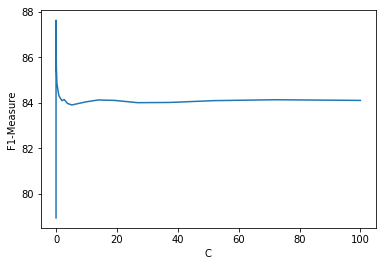

In [22]:
""" Support Vector Machine """
x_SVM_train = IMDB_TrainBinaryBag
y_SVM_train = np.ravel(train_IMDB_label)
x_SVM_valid = IMDB_ValidBinaryBag
y_SVM_valid = np.ravel(valid_IMDB_label)
x_SVM_test = IMDB_TestBinaryBag
y_SVM_test = np.ravel(test_IMDB_label)

""" Hyper Parameter Tuning on Validation Set """
F1_measure_SVM = []
c_list_SVM = []
for c in np.logspace(-5, 2, 50):
    clf_SVM = LinearSVC(penalty='l2', loss='squared_hinge',C= c , dual= False)
    clf_SVM.fit(x_SVM_train, y_SVM_train)
    prediction_valid = clf_SVM.predict(x_SVM_valid)
    F1_measure_valid = f1_score(valid_IMDB_label, prediction_valid, average='macro')*100
    F1_measure_SVM = np.append(F1_measure_SVM, F1_measure_valid)
    c_list_SVM = np.append(c_list_SVM, c)
    print("Validation F1-Measure:", F1_measure_valid,"\t\t" "C:", c)

best_c = c_list_SVM [np.argmax(F1_measure_SVM)]
print('\n''Best Penalty Parameter is', best_c,'and F1-Measure for validation set corresponding to best Alpha is', max(F1_measure_SVM))

""" Plotting """

a = F1_measure_SVM.squeeze()
b = c_list_SVM.squeeze()
plt.plot(b , a)
plt.xlabel('C')
plt.ylabel('F1-Measure')
# plt.legend(loc ='upper right')
plt.show()

# Support Vector Machine Classifier

In [63]:
""" SVM Classifier for Train Set """
clf_SVM = LinearSVC(penalty='l2', loss='squared_hinge', C=0.00517947467923)
clf_SVM.fit(x_SVM_train, y_SVM_train)
prediction_train = clf_SVM.predict(x_SVM_train)
accuracy = accuracy_score(prediction_train,y_SVM_train)*100
F1_measure_train = f1_score(train_IMDB_label, prediction_train, average='macro')*100
print("Train Set has Accuracy",accuracy,"and F1-Measure",F1_measure_train,".")


""" SVM Classifier for Validation Set """
prediction_valid = clf_SVM.predict(x_SVM_valid)
accuracy = accuracy_score(prediction_valid,y_SVM_valid)*100
F1_measure_valid = f1_score(valid_IMDB_label, prediction_valid, average='macro')*100
print("Train Set has Accuracy",accuracy ,"and F1-Measure",F1_measure_valid,".")


""" SVM Classifier for Test Set """
prediction_test = clf_SVM.predict(x_SVM_test)
accuracy = accuracy_score(prediction_test,y_SVM_test)*100
F1_measure_test = f1_score(test_IMDB_label, prediction_test, average='macro')*100
print("Train Set has Accuracy",accuracy ,"and F1-Measure",F1_measure_test,".")

Train Set has Accuracy 94.6866666667 and F1-Measure 94.6864161253 .
Train Set has Accuracy 87.64 and F1-Measure 87.6391688577 .
Train Set has Accuracy 87.292 and F1-Measure 87.2914859457 .


Confusion matrix, without normalization
[[10832  1668]
 [ 1509 10991]]
Normalized confusion matrix
[[ 0.87  0.13]
 [ 0.12  0.88]]


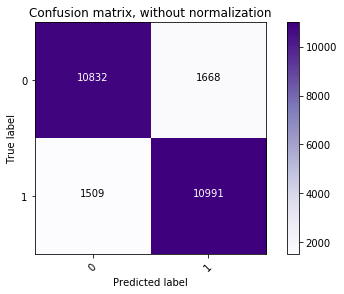

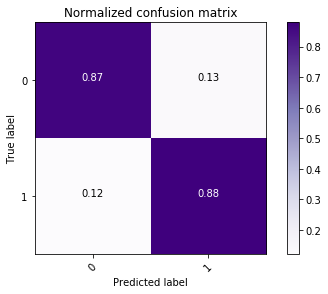

In [64]:
class_names = ['0', '1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_IMDB_label, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Decision Tree Hyperparameter Tuning

Validation F1-Measure: 58.0019481914 		Depth: 1
Validation F1-Measure: 62.6702842121 		Depth: 2
Validation F1-Measure: 65.2812310283 		Depth: 3
Validation F1-Measure: 65.370456566 		Depth: 4
Validation F1-Measure: 67.0360709811 		Depth: 5
Validation F1-Measure: 69.3139947651 		Depth: 6
Validation F1-Measure: 70.6398654997 		Depth: 7
Validation F1-Measure: 70.7423392678 		Depth: 8
Validation F1-Measure: 71.4227792324 		Depth: 9
Validation F1-Measure: 71.2756181068 		Depth: 10
Validation F1-Measure: 70.9455899694 		Depth: 11
Validation F1-Measure: 71.2115888312 		Depth: 12
Validation F1-Measure: 71.5054645049 		Depth: 13
Validation F1-Measure: 71.7784022481 		Depth: 14
Validation F1-Measure: 71.6931268032 		Depth: 15
Validation F1-Measure: 72.0060410803 		Depth: 16
Validation F1-Measure: 71.3385053437 		Depth: 17
Validation F1-Measure: 71.6942567867 		Depth: 18
Validation F1-Measure: 71.6350688144 		Depth: 19
Validation F1-Measure: 71.4349491483 		Depth: 20
Validation F1-Measure: 71.2998

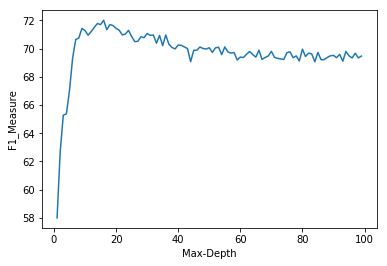

In [34]:
""" Decision Tree """
x_DT_train = IMDB_TrainBinaryBag
y_DT_train = np.ravel(train_IMDB_label)
x_DT_valid = IMDB_ValidBinaryBag
y_DT_valid = np.ravel(valid_IMDB_label)
x_DT_test = IMDB_TestBinaryBag
y_DT_test = np.ravel(test_IMDB_label)

""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT = []
depth_list_DT= []
for depth in range(1,100,1):
    clf_decisionTree = DecisionTreeClassifier(criterion= "gini", random_state=1, max_depth=depth)
    clf_decisionTree.fit(x_DT_train, y_DT_train)
    prediction_DT_valid = clf_decisionTree.predict(x_DT_valid)
    F1_measure_valid = f1_score(valid_IMDB_label, prediction_DT_valid, average='macro')*100
    F1_measure_DT = np.append(F1_measure_DT, F1_measure_valid)
    depth_list_DT = np.append(depth_list_DT, depth)
    print("Validation F1-Measure:", F1_measure_valid, "\t\t""Depth:", depth)

best_depth = depth_list_DT [np.argmax(F1_measure_DT)]
print('\n''Best Alpha is', best_depth,'and F1-Measure for validation set corresponding to best Alpha is', max(F1_measure_DT))


""" Plotting """

a = F1_measure_DT.squeeze()
b = depth_list_DT.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Max-Depth")
# plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 72.0060410803 		Min_Sample_Split: 2
Validation F1-Measure: 72.0879690966 		Min_Sample_Split: 7
Validation F1-Measure: 72.1297658952 		Min_Sample_Split: 12
Validation F1-Measure: 71.8570870597 		Min_Sample_Split: 17
Validation F1-Measure: 71.8323695192 		Min_Sample_Split: 22
Validation F1-Measure: 72.003601221 		Min_Sample_Split: 27
Validation F1-Measure: 71.9364146509 		Min_Sample_Split: 32
Validation F1-Measure: 71.7516208435 		Min_Sample_Split: 37
Validation F1-Measure: 71.6454852561 		Min_Sample_Split: 42
Validation F1-Measure: 71.7337846947 		Min_Sample_Split: 47
Validation F1-Measure: 71.8738013237 		Min_Sample_Split: 52
Validation F1-Measure: 71.8789334167 		Min_Sample_Split: 57
Validation F1-Measure: 71.8827657884 		Min_Sample_Split: 62
Validation F1-Measure: 71.945091884 		Min_Sample_Split: 67
Validation F1-Measure: 71.8290079733 		Min_Sample_Split: 72
Validation F1-Measure: 72.0796046488 		Min_Sample_Split: 77
Validation F1-Measure: 71.9021997127 		Min_S

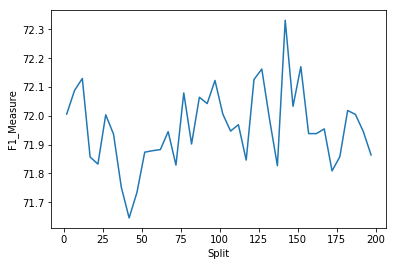

In [66]:
""" Decision Tree """
""" Tuning Min-Sample-Split """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT = []
split_list_DT= []
for split in range(2,200,5):
    clf_decisionTree = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split = split, min_samples_leaf=1, max_depth = 16.0)
    clf_decisionTree.fit(x_DT_train, y_DT_train)
    prediction_DT_valid = clf_decisionTree.predict(x_DT_valid)
    F1_measure_valid = f1_score(valid_IMDB_label, prediction_DT_valid, average='macro')*100
    F1_measure_DT = np.append(F1_measure_DT, F1_measure_valid)
    split_list_DT= np.append(split_list_DT, split)
    print("Validation F1-Measure:", F1_measure_valid, "\t\t""Min_Sample_Split:", split)

best_split = split_list_DT [np.argmax(F1_measure_DT)]
print('\n''Best Min_Sample_Split is', best_split,'and F1-Measure for validation set corresponding to best split is', max(F1_measure_DT))

""" Plotting """

a = F1_measure_DT.squeeze()
b = split_list_DT.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Split")
# plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 71.8655316693 		Min_Sample_Leaf: 1
Validation F1-Measure: 72.4933542712 		Min_Sample_Leaf: 6
Validation F1-Measure: 72.1763680934 		Min_Sample_Leaf: 11
Validation F1-Measure: 72.2305315322 		Min_Sample_Leaf: 16
Validation F1-Measure: 71.8546115076 		Min_Sample_Leaf: 21
Validation F1-Measure: 71.8845595255 		Min_Sample_Leaf: 26
Validation F1-Measure: 72.1800744667 		Min_Sample_Leaf: 31
Validation F1-Measure: 72.2191518921 		Min_Sample_Leaf: 36
Validation F1-Measure: 72.3562381355 		Min_Sample_Leaf: 41
Validation F1-Measure: 72.1641517673 		Min_Sample_Leaf: 46
Validation F1-Measure: 72.2345220762 		Min_Sample_Leaf: 51
Validation F1-Measure: 71.1897561584 		Min_Sample_Leaf: 56
Validation F1-Measure: 71.5927120923 		Min_Sample_Leaf: 61
Validation F1-Measure: 71.6631267619 		Min_Sample_Leaf: 66
Validation F1-Measure: 71.0197396057 		Min_Sample_Leaf: 71
Validation F1-Measure: 71.0968724861 		Min_Sample_Leaf: 76
Validation F1-Measure: 71.0968724861 		Min_Sample_Leaf: 81

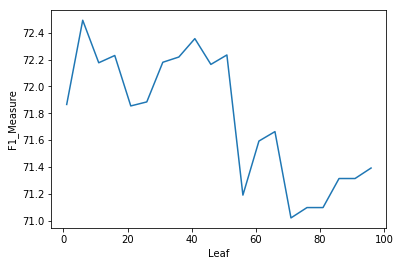

In [70]:
""" Decision Tree """
""" Tuning Min-Sample-Leaf """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT = []
leaf_list_DT= []
for leaf in range(1,100,5):
    clf_decisionTree = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split = 142 , min_samples_leaf= leaf, max_depth=18.0)
    clf_decisionTree.fit(x_DT_train, y_DT_train)
    prediction_DT_valid = clf_decisionTree.predict(x_DT_valid)
    F1_measure_valid = f1_score(valid_IMDB_label, prediction_DT_valid, average='macro')*100
    F1_measure_DT = np.append(F1_measure_DT, F1_measure_valid)
    leaf_list_DT = np.append(leaf_list_DT, leaf)
    print("Validation F1-Measure:", F1_measure_valid, "\t\t""Min_Sample_Leaf:", leaf)

best_leaf = leaf_list_DT [np.argmax(F1_measure_DT)]
print('\n''Best Min_Sample_Leaf is', best_leaf,'and F1-Measure for validation set corresponding to best leaf is', max(F1_measure_DT))

""" Plotting """

a = F1_measure_DT.squeeze()
b = leaf_list_DT.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Leaf")
# plt.legend(loc ='upper right')
plt.show()

# Decision Tree Classifier

In [75]:
""" Decision Tree Classifier for Train Set """
clf_decisionTree = DecisionTreeClassifier(criterion= "gini", random_state=1, max_depth=16.0,  min_samples_split = 142, min_samples_leaf=6)
clf_decisionTree.fit(x_DT_train, y_DT_train)
prediction_DT_Train = clf_decisionTree.predict(x_DT_train)
accuracy = accuracy_score(prediction_DT_Train,y_DT_train)*100
print("Decision Tree Classifier Accuracy for Train Set:",accuracy)
F1_measure_train = f1_score(train_IMDB_label, prediction_DT_Train, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Train set:", F1_measure_train)


""" Decision Tree Classifier for Validation Set """
prediction_DT_Valid = clf_decisionTree.predict(x_DT_valid)
accuracy = accuracy_score(prediction_DT_Valid ,y_DT_valid)*100
print("Decision Tree Classifier Accuracy for Validation Set:",accuracy)
F1_measure_valid = f1_score(valid_IMDB_label, prediction_DT_Valid, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Validation set:", F1_measure_valid)

""" Decision Tree Classifier for Test Set """
prediction_DT_Test = clf_decisionTree.predict(x_DT_test)
accuracy = accuracy_score(prediction_DT_Test ,y_DT_test)*100
print("Decision Tree Classifier Accuracy for Validation Set:",accuracy)
F1_measure_test = f1_score(test_IMDB_label, prediction_DT_Test, average='macro')*100
print("F1-Measure for Decision Tree Classifier on Validation set:", F1_measure_test)


Decision Tree Classifier Accuracy for Train Set: 77.3933333333
F1-Measure for Decision Tree Classifier on Train set: 77.323399807
Decision Tree Classifier Accuracy for Validation Set: 72.66
F1-Measure for Decision Tree Classifier on Validation set: 72.5670781097
Decision Tree Classifier Accuracy for Validation Set: 73.296
F1-Measure for Decision Tree Classifier on Validation set: 73.205364853


Confusion matrix, without normalization
[[8435 4065]
 [2611 9889]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.21  0.79]]


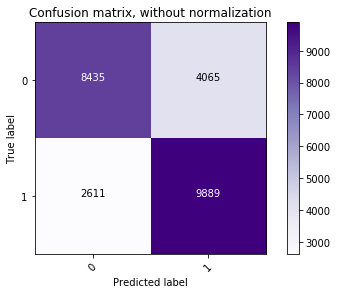

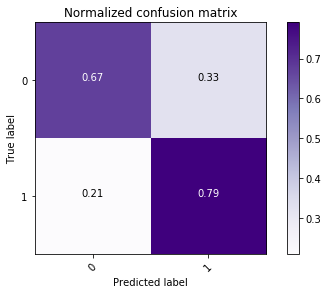

In [77]:
class_names = ['0', '1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_IMDB_label, prediction_DT_Test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Frequency Bag-of-word 


In [26]:
IMDB_TrainFrequencyBag = np.zeros([15000,10000])

for i in range(len(train_IMDB_par)):
    for sentence in train_IMDB_par[i]:
        word = sentence.split()
        for j in range(len(IMDB_Feature)):
            if IMDB_TrainBinaryBag [i][j] == 1:
                IMDB_TrainFrequencyBag [i][j] = word.count(IMDB_Feature[j]) 
        row_sum = np.sum(IMDB_TrainFrequencyBag [i][:])   
        for j in range(len(IMDB_TrainFrequencyBag[0])):
            IMDB_TrainFrequencyBag [i][j] = IMDB_TrainFrequencyBag [i][j]/row_sum

In [27]:
IMDB_ValidFrequencyBag = np.zeros([10000,10000])

for i in range(len(valid_IMDB_par)):
    for sentence in valid_IMDB_par[i]:
        word = sentence.split()
        for j in range(len(IMDB_Feature)):
            if IMDB_ValidBinaryBag [i][j] == 1:
                IMDB_ValidFrequencyBag [i][j] = word.count(IMDB_Feature[j]) 
        row_sum = np.sum(IMDB_ValidFrequencyBag [i][:])   
        for j in range(len(IMDB_ValidFrequencyBag[0])):
            IMDB_ValidFrequencyBag [i][j] = IMDB_ValidFrequencyBag [i][j]/row_sum

In [28]:
IMDB_TestFrequencyBag = np.zeros([25000,10000])

for i in range(len(test_IMDB_par)):
    for sentence in test_IMDB_par[i]:
        word = sentence.split()
        for j in range(len(IMDB_Feature)):
            if IMDB_TestBinaryBag [i][j] == 1:
                IMDB_TestFrequencyBag [i][j] = word.count(IMDB_Feature[j]) 
        row_sum = np.sum(IMDB_TestFrequencyBag [i][:])   
        for j in range(len(IMDB_TestFrequencyBag[0])):
            IMDB_TestFrequencyBag [i][j] = IMDB_TestFrequencyBag [i][j]/row_sum

# Naive Bayse Classifier

In [29]:
""" Training Naive Bayse Classifier """
x_NB_train_F = IMDB_TrainFrequencyBag
y_NB_train_F = np.ravel(train_IMDB_label)
x_NB_valid_F = IMDB_ValidFrequencyBag
y_NB_valid_F = np.ravel(valid_IMDB_label)
x_NB_test_F = IMDB_TestFrequencyBag
y_NB_test_F = np.ravel(test_IMDB_label)

""" Naive Bayes for Training Set """
gnb = GaussianNB()
gnb.fit(x_NB_train_F,y_NB_train_F)
result_train_F= gnb.predict(x_NB_train_F)
accuracy_train_F = accuracy_score(result_train_F,y_NB_train_F)*100
F1_measure_train_F = f1_score(train_IMDB_label ,result_train_F ,average='macro')*100
print("Train Set has Accuracy",accuracy_train_F ,"and F1-Measure",F1_measure_train_F,".")

""" Naive Bayes for Validation Set """
result_valid_F= mnb.predict(x_NB_valid_F)
accuracy_valid_F = accuracy_score(result_valid_F,y_NB_valid_F)*100
F1_measure_valid_F = f1_score(valid_IMDB_label, result_valid_F, average='macro')*100
print("Validation Set has Accuracy",accuracy_valid_F ,"and F1-Measure",F1_measure_valid_F,".")



""" Naive Bayes for Test Set """
result_test_F= mnb.predict(x_NB_test_F)
accuracy_test_F = accuracy_score(result_test_F,y_NB_test_F)*100
F1_measure_test_F = f1_score(test_IMDB_label, result_test_F, average='macro')*100
print("Test Set has Accuracy",accuracy_test_F ,"and F1-Measure",F1_measure_test_F,".")

Train Set has Accuracy 86.1666666667 and F1-Measure 86.1194341858 .
Validation Set has Accuracy 84.22 and F1-Measure 84.216448701 .
Test Set has Accuracy 83.108 and F1-Measure 83.0910726487 .


Confusion matrix, without normalization
[[10784  1716]
 [ 2507  9993]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.2   0.8 ]]


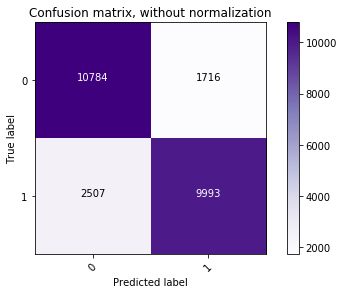

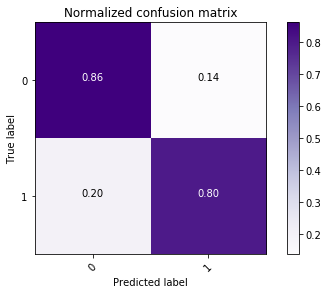

In [52]:
class_names = ['0', '1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_IMDB_label, result_test_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Support Vector Machine Hyperparameter Tuning


 Validation F1-Measure: 66.0181168753 		C: 0.01
 Validation F1-Measure: 66.1379041207 		C: 0.0126485521686
 Validation F1-Measure: 66.5182917815 		C: 0.0159985871961
 Validation F1-Measure: 66.8282757858 		C: 0.0202358964773
 Validation F1-Measure: 67.0987395436 		C: 0.025595479227
 Validation F1-Measure: 67.5508415495 		C: 0.0323745754282
 Validation F1-Measure: 67.9012611183 		C: 0.0409491506238
 Validation F1-Measure: 68.3421966681 		C: 0.0517947467923
 Validation F1-Measure: 68.9328222393 		C: 0.065512855686
 Validation F1-Measure: 69.4224629429 		C: 0.0828642772855
 Validation F1-Measure: 70.0528977452 		C: 0.104811313415
 Validation F1-Measure: 70.642946968 		C: 0.132571136559
 Validation F1-Measure: 71.3632964341 		C: 0.167683293681
 Validation F1-Measure: 72.0728506498 		C: 0.212095088792
 Validation F1-Measure: 73.1825208732 		C: 0.268269579528
 Validation F1-Measure: 73.9818487734 		C: 0.33932217719
 Validation F1-Measure: 75.0117228831 		C: 0.429193426013
 Validation F1-Meas

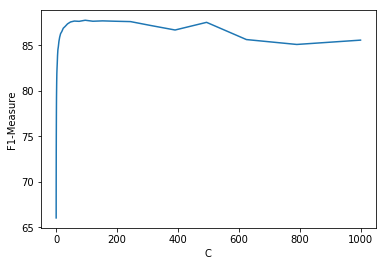

In [30]:
""" Support Vector Machine """
x_SVM_train_F = IMDB_TrainFrequencyBag
y_SVM_train_F = np.ravel(train_IMDB_label)
x_SVM_valid_F = IMDB_ValidFrequencyBag
y_SVM_valid_F = np.ravel(valid_IMDB_label)
x_SVM_test_F = IMDB_TestFrequencyBag
y_SVM_test_F = np.ravel(test_IMDB_label)

""" Hyper Parameter Tuning on Validation Set """
F1_measure_SVM_F = []
c_list_SVM_F = []
for c in np.logspace(-2, 3, 50):
    clf_SVM_F = LinearSVC(penalty='l2', loss='squared_hinge',C= c )
    clf_SVM_F.fit(x_SVM_train_F, y_SVM_train_F)
    prediction_valid_F = clf_SVM_F.predict(x_SVM_valid_F)
    F1_measure_valid_F = f1_score(valid_IMDB_label, prediction_valid_F, average='macro')*100
    F1_measure_SVM_F = np.append(F1_measure_SVM_F, F1_measure_valid_F)
    c_list_SVM_F = np.append(c_list_SVM_F, c)
    print(" Validation F1-Measure:", F1_measure_valid_F,"\t\t" "C:", c)

best_c = c_list_SVM_F [np.argmax(F1_measure_SVM_F)]
print('\n''Best Penalty Parameter is', best_c,'and F1-Measure for validation set corresponding to best penalty is', max(F1_measure_SVM_F))
    
""" Plotting """

a = F1_measure_SVM_F.squeeze()
b = c_list_SVM_F.squeeze()
plt.plot(b , a)
plt.xlabel('C')
plt.ylabel('F1-Measure')
# plt.legend(loc ='lower right')
plt.show()

# Support Vector Machine Classifier

In [80]:
""" SVM Classifier for Train Set """
clf_SVM_F = LinearSVC(penalty='l2', loss='squared_hinge', C=95.409547635)
clf_SVM_F.fit(x_SVM_train_F, y_SVM_train_F)
prediction_train_F = clf_SVM_F.predict(x_SVM_train_F)
accuracy_F = accuracy_score(prediction_train_F,y_SVM_train_F)*100
F1_measure_train_F = f1_score(train_IMDB_label, prediction_train_F, average='macro')*100
print("Train Set has Accuracy",accuracy_F ,"and F1-Measure",F1_measure_train_F,".")

""" SVM Classifier for Validation Set """
prediction_valid_F = clf_SVM_F.predict(x_SVM_valid_F)
accuracy_F = accuracy_score(prediction_valid_F,y_SVM_valid_F)*100
F1_measure_valid_F = f1_score(valid_IMDB_label, prediction_valid_F, average='macro')*100
print("Validation Set has Accuracy",accuracy_F ,"and F1-Measure",F1_measure_valid_F,".")

""" SVM Classifier for Test Set """
prediction_test_F = clf_SVM_F.predict(x_SVM_test_F)
accuracy_F = accuracy_score(prediction_test_F,y_SVM_test_F)*100
F1_measure_test_F = f1_score(test_IMDB_label, prediction_test_F, average='macro')*100
print("Test Set has Accuracy",accuracy_F ,"and F1-Measure",F1_measure_test_F,".")

Train Set has Accuracy 94.46 and F1-Measure 94.4598894686 .
Validation Set has Accuracy 87.77 and F1-Measure 87.7688961429 .
Test Set has Accuracy 87.364 and F1-Measure 87.3639343127 .


Confusion matrix, without normalization
[[ 9715  2785]
 [ 2445 10055]]
Normalized confusion matrix
[[ 0.78  0.22]
 [ 0.2   0.8 ]]


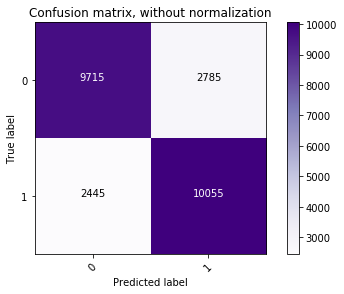

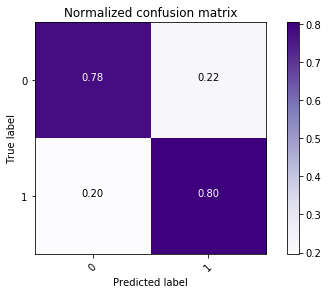

In [79]:
class_names = ['0', '1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_IMDB_label, prediction_test_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Decision Tree Hyperparameter Tuning

Validation F1-Measure: 57.6382750946 		Depth: 1
Validation F1-Measure: 62.6092492137 		Depth: 2
Validation F1-Measure: 65.1837415214 		Depth: 3
Validation F1-Measure: 66.9600920212 		Depth: 4
Validation F1-Measure: 66.9771719098 		Depth: 5
Validation F1-Measure: 69.5340691355 		Depth: 6
Validation F1-Measure: 70.4341319766 		Depth: 7
Validation F1-Measure: 71.3203647136 		Depth: 8
Validation F1-Measure: 70.8181866722 		Depth: 9
Validation F1-Measure: 69.9272954139 		Depth: 10
Validation F1-Measure: 71.6465822935 		Depth: 11
Validation F1-Measure: 71.3923471009 		Depth: 12
Validation F1-Measure: 70.7827754709 		Depth: 13
Validation F1-Measure: 71.6037888189 		Depth: 14
Validation F1-Measure: 70.7613170688 		Depth: 15
Validation F1-Measure: 71.2038392955 		Depth: 16
Validation F1-Measure: 70.7628676785 		Depth: 17
Validation F1-Measure: 70.998276774 		Depth: 18
Validation F1-Measure: 70.9134911388 		Depth: 19
Validation F1-Measure: 70.6613046288 		Depth: 20
Validation F1-Measure: 70.5678

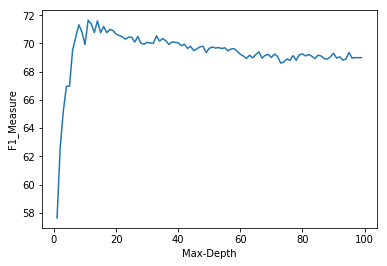

In [35]:
""" Decision Tree """
x_DT_train_F = IMDB_TrainFrequencyBag
y_DT_train_F = np.ravel(train_IMDB_label)
x_DT_valid_F = IMDB_ValidFrequencyBag
y_DT_valid_F = np.ravel(valid_IMDB_label)
x_DT_test_F = IMDB_TestFrequencyBag
y_DT_test_F = np.ravel(test_IMDB_label)

""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT_F = []
depth_list_DT_F= []
for depth in range(1,100,1):
    clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, max_depth=depth)
    clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
    prediction_DT_valid_F = clf_decisionTree_F.predict(x_DT_valid_F)
    F1_measure_valid_F = f1_score(valid_IMDB_label, prediction_DT_valid_F, average='macro')*100
    F1_measure_DT_F = np.append(F1_measure_DT_F, F1_measure_valid_F)
    depth_list_DT_F = np.append(depth_list_DT_F, depth)
    print("Validation F1-Measure:", F1_measure_valid_F, "\t\t" "Depth:", depth)

best_depth = depth_list_DT_F [np.argmax(F1_measure_DT_F)]
print('\n''Best depth is', best_depth,'and F1-Measure for validation set corresponding to best depth is', max(F1_measure_DT_F))


""" Plotting """

a = F1_measure_DT_F.squeeze()
b = depth_list_DT_F.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Max-Depth")
# plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 71.6465822935 		Min_Sample_Split: 2
Validation F1-Measure: 71.5533128395 		Min_Sample_Split: 7
Validation F1-Measure: 71.4198368169 		Min_Sample_Split: 12
Validation F1-Measure: 71.2274520496 		Min_Sample_Split: 17
Validation F1-Measure: 71.2182898362 		Min_Sample_Split: 22
Validation F1-Measure: 71.2674038515 		Min_Sample_Split: 27
Validation F1-Measure: 71.4093874947 		Min_Sample_Split: 32
Validation F1-Measure: 71.4516716552 		Min_Sample_Split: 37
Validation F1-Measure: 71.4849365338 		Min_Sample_Split: 42
Validation F1-Measure: 71.5700262817 		Min_Sample_Split: 47
Validation F1-Measure: 71.5506317621 		Min_Sample_Split: 52
Validation F1-Measure: 71.614180544 		Min_Sample_Split: 57
Validation F1-Measure: 71.5409339912 		Min_Sample_Split: 62
Validation F1-Measure: 71.6031508421 		Min_Sample_Split: 67
Validation F1-Measure: 71.7235615099 		Min_Sample_Split: 72
Validation F1-Measure: 71.6275183124 		Min_Sample_Split: 77
Validation F1-Measure: 71.6365255069 		Min_

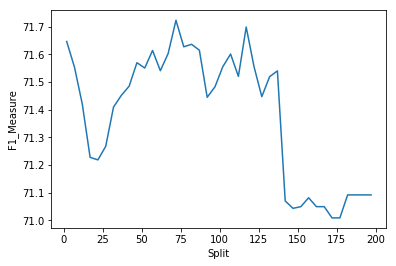

In [81]:
""" Decision Tree """
""" Tuning Min-Sample-Split """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT_F = []
split_list_DT_F= []
for split in range(2,200,5):
    clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split = split, min_samples_leaf=1, max_depth = 11.0)
    clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
    prediction_DT_valid_F = clf_decisionTree_F.predict(x_DT_valid_F)
    F1_measure_valid_F = f1_score(valid_IMDB_label, prediction_DT_valid_F, average='macro')*100
    F1_measure_DT_F = np.append(F1_measure_DT_F, F1_measure_valid_F)
    split_list_DT_F= np.append(split_list_DT_F, split)
    print("Validation F1-Measure:", F1_measure_valid_F, "\t\t""Min_Sample_Split:", split)

best_split_F = split_list_DT_F [np.argmax(F1_measure_DT_F)]
print('\n''Best Min_Sample_Split is', best_split_F,'and F1-Measure for validation set corresponding to best split is', max(F1_measure_DT_F))

""" Plotting """

a = F1_measure_DT_F.squeeze()
b = split_list_DT_F.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Split")
# plt.legend(loc ='upper right')
plt.show()

Validation F1-Measure: 71.7235615099 		Min_Sample_Leaf: 1
Validation F1-Measure: 71.6859000446 		Min_Sample_Leaf: 11
Validation F1-Measure: 71.7313495121 		Min_Sample_Leaf: 21
Validation F1-Measure: 72.051630109 		Min_Sample_Leaf: 31
Validation F1-Measure: 71.933417489 		Min_Sample_Leaf: 41
Validation F1-Measure: 71.3846005867 		Min_Sample_Leaf: 51
Validation F1-Measure: 71.5936362694 		Min_Sample_Leaf: 61
Validation F1-Measure: 71.0430048064 		Min_Sample_Leaf: 71
Validation F1-Measure: 70.8725508431 		Min_Sample_Leaf: 81
Validation F1-Measure: 71.037255342 		Min_Sample_Leaf: 91

Best Min_Sample_Leaf is 31.0 and F1-Measure for validation set corresponding to best leaf is 72.051630109


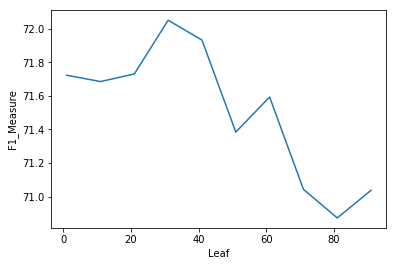

In [85]:
""" Decision Tree """
""" Tuning Min-Sample-Leaf """
""" Hyper Parameter Tuning on Validation Set """
F1_measure_DT_F = []
leaf_list_DT_F= []
for leaf in range(1,100,10):
    clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, min_samples_split = 72 , min_samples_leaf= leaf, max_depth=11.0)
    clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
    prediction_DT_valid_F = clf_decisionTree_F.predict(x_DT_valid_F)
    F1_measure_valid_F = f1_score(valid_IMDB_label, prediction_DT_valid_F, average='macro')*100
    F1_measure_DT_F = np.append(F1_measure_DT_F, F1_measure_valid_F)
    leaf_list_DT_F = np.append(leaf_list_DT_F, leaf)
    print("Validation F1-Measure:", F1_measure_valid_F, "\t\t""Min_Sample_Leaf:", leaf)

best_leaf_F = leaf_list_DT_F [np.argmax(F1_measure_DT_F)]
print('\n''Best Min_Sample_Leaf is', best_leaf_F,'and F1-Measure for validation set corresponding to best leaf is', max(F1_measure_DT_F))

""" Plotting """

a = F1_measure_DT_F.squeeze()
b = leaf_list_DT_F.squeeze()
plt.plot(b , a)
plt.ylabel('F1_Measure')
plt.xlabel("Leaf")
# plt.legend(loc ='upper right')
plt.show()

# Decision Tree Classifire

In [90]:
""" Decision Tree Classifier for Train Set """
clf_decisionTree_F = DecisionTreeClassifier(criterion= "gini", random_state=1, max_depth=None, min_samples_split = 2 , min_samples_leaf= 1)
clf_decisionTree_F.fit(x_DT_train_F, y_DT_train_F)
prediction_DT_Train_F = clf_decisionTree_F.predict(x_DT_train_F)
accuracy_F = accuracy_score(prediction_DT_Train_F,y_DT_train_F)*100
F1_measure_train_F = f1_score(train_IMDB_label, prediction_DT_Train_F, average='macro')*100
print("Train Set has Accuracy",accuracy_F ,"and F1-Measure",F1_measure_train_F,".")

""" Decision Tree Classifier for Validation Set """
prediction_DT_Valid_F = clf_decisionTree_F.predict(x_DT_valid)
accuracy_F = accuracy_score(prediction_DT_Valid_F ,y_DT_valid_F)*100
F1_measure_valid_F = f1_score(valid_IMDB_label, prediction_DT_Valid_F, average='macro')*100
print("Validation Set has Accuracy",accuracy_F ,"and F1-Measure",F1_measure_valid_F,".")

""" Decision Tree Classifier for Test Set """
prediction_DT_Test_F = clf_decisionTree_F.predict(x_DT_test)
accuracy_F = accuracy_score(prediction_DT_Test_F ,y_DT_test_F)*100
F1_measure_test_F = f1_score(test_IMDB_label, prediction_DT_Test_F, average='macro')*100
print("Test Set has Accuracy",accuracy_F ,"and F1-Measure",F1_measure_test_F,".")

Train Set has Accuracy 100.0 and F1-Measure 100.0 .
Validation Set has Accuracy 57.37 and F1-Measure 57.3422618057 .
Test Set has Accuracy 58.5 and F1-Measure 58.4623164153 .


Confusion matrix, without normalization
[[7689 4811]
 [5564 6936]]
Normalized confusion matrix
[[ 0.62  0.38]
 [ 0.45  0.55]]


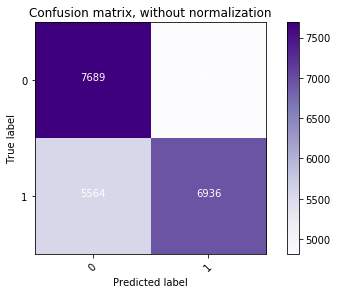

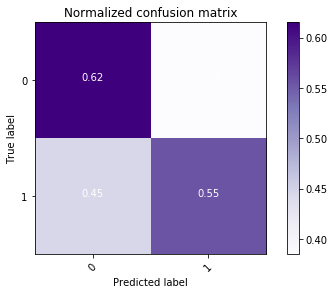

In [91]:
class_names = ['0','1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_IMDB_label, prediction_DT_Test_F)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()